In [1]:
import pandas as pd
import seaborn as sns

In [2]:
path = '/novo/projects/departments/cdd/public/users/ehec/wi25/250217_amypro_predictions.csv'
kmer_df = pd.read_csv(path,index_col=0).reset_index(drop=True)
kmer_df

,name,sequence,dataset,len,kmer_position,data_split,predictions_prob,predictions
0,Prolactin__AP00001,LPICPG,amypro27,199,0,test,0.175442,False
1,Prolactin__AP00001,PICPGG,amypro27,199,1,test,0.144141,False
2,Prolactin__AP00001,ICPGGA,amypro27,199,2,test,0.127774,False
3,Prolactin__AP00001,CPGGAA,amypro27,199,3,test,0.054882,False
4,Prolactin__AP00001,PGGAAR,amypro27,199,4,test,0.009287,False
...,...,...,...,...,...,...,...,...
4293,Galectin-7__AP00139,DVQLDS,amypro27,136,126,test,0.105357,False
4294,Galectin-7__AP00139,VQLDSV,amypro27,136,127,test,0.282540,False
4295,Galectin-7__AP00139,QLDSVR,amypro27,136,128,test,0.179063,False
4296,Galectin-7__AP00139,LDSVRI,amypro27,136,129,test,0.089637,False


In [3]:
kmer_length = 6
kmer_df['res_idx'] = kmer_df['kmer_position'].apply(lambda x: range(x,x+kmer_length))
kmer_df = kmer_df.explode(['res_idx']).reset_index()
res_agg_df = kmer_df.groupby(['name','res_idx']).agg(
    agg_propensity = pd.NamedAgg('predictions_prob','mean'),
    agg_propensity_stdev = pd.NamedAgg('predictions_prob','std'),
    n_kmers = pd.NamedAgg('predictions_prob','size'),
).reset_index()
res_agg_df

,name,res_idx,agg_propensity,agg_propensity_stdev,n_kmers
0,Alpha-s2-casein__AP00004,0,0.030183,NaN,1
1,Alpha-s2-casein__AP00004,1,0.069989,0.056295,2
2,Alpha-s2-casein__AP00004,2,0.112690,0.083991,3
3,Alpha-s2-casein__AP00004,3,0.156459,0.111203,4
4,Alpha-s2-casein__AP00004,4,0.149923,0.097407,5
...,...,...,...,...,...
4428,Serum_Amyloid_A-1__AP00005,99,0.042782,0.019540,5
4429,Serum_Amyloid_A-1__AP00005,100,0.038758,0.020028,4
4430,Serum_Amyloid_A-1__AP00005,101,0.045863,0.017287,3
4431,Serum_Amyloid_A-1__AP00005,102,0.043186,0.023552,2


(0.0, 1.0)

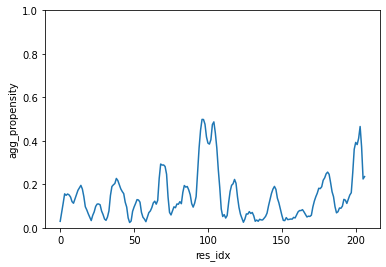

In [6]:
ax = sns.lineplot(data=res_agg_df[res_agg_df['name']==' Alpha-s2-casein__AP00004'],
             x='res_idx',y='agg_propensity')
ax.set_ylim(0,1.0)

(0.0, 1.0)

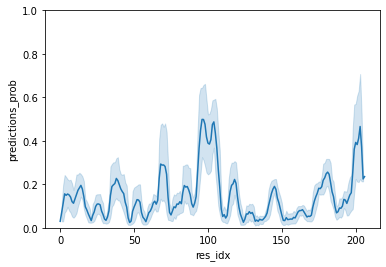

In [9]:
ax = sns.lineplot(data=kmer_df[kmer_df['name']==' Alpha-s2-casein__AP00004'],
             x='res_idx',y='predictions_prob')
ax.set_ylim(0,1.0)